In [3]:
# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings('ignore')

# Read raw data from the file
from sklearn.preprocessing import LabelEncoder

import pandas #provides data structures to quickly analyze data
#Since this code runs on Kaggle server, data can be accessed directly in the 'input' folder
#Read the train dataset
dataset = pandas.read_csv("data/train.csv") 
dataset = dataset.apply(LabelEncoder().fit_transform)


#Read test dataset
dataset_test = pandas.read_csv("data/test.csv")
dataset_test = dataset_test.apply(LabelEncoder().fit_transform)

#Save the id's for submission file
ID = dataset_test['ID']
#Drop unnecessary columns
dataset_test.drop('ID',axis=1,inplace=True)

#Print all rows and columns. Dont hide any
pandas.set_option('display.max_rows', None)
pandas.set_option('display.max_columns', None)

#Display the first five rows to get a feel of the data
print(dataset.head(5))

#Learning : cat1 to cat116 contain alphabets

   ID     y  X0  X1  X2  X3  X4  X5  X6  X8  X10  X11  X12  X13  X14  X15  \
0   0  2466  32  23  17   0   3  24   9  14    0    0    0    1    0    0   
1   1   366  32  21  19   4   3  28  11  14    0    0    0    0    0    0   
2   2    69  20  24  34   2   3  27   9  23    0    0    0    0    0    0   
3   3   133  20  21  34   5   3  27  11   4    0    0    0    0    0    0   
4   4   106  20  23  34   5   3  12   3  13    0    0    0    0    0    0   

   X16  X17  X18  X19  X20  X21  X22  X23  X24  X26  X27  X28  X29  X30  X31  \
0    0    0    1    0    0    1    0    0    0    0    0    0    0    0    1   
1    0    0    1    0    0    0    0    0    0    0    1    0    0    0    1   
2    0    1    0    0    0    0    0    0    0    0    1    1    1    0    1   
3    0    0    0    0    0    0    0    0    0    0    1    1    1    0    1   
4    0    0    0    0    0    0    0    0    0    0    1    1    1    0    1   

   X32  X33  X34  X35  X36  X37  X38  X39  X40  X41  X42

## Data statistics
* Shape

In [4]:
# Size of the dataframe

print(dataset.shape)

# We can see that there are 188318 instances having 132 attributes

#Drop the first column 'id' since it just has serial numbers. Not useful in the prediction process.
dataset = dataset.iloc[:,1:]

#Learning : Data is loaded successfully as dimensions match the data description

(4209, 378)


## Data statistics
* Description

In [5]:
# Statistical description

print(dataset.describe())

# Learning :
# No attribute in continuous columns is missing as count is 188318 for all, all rows can be used
# No negative values are present. Tests such as chi2 can be used
# Statistics not displayed for categorical data

                 y           X0           X1           X2           X3  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000   
mean   1200.809931    29.760751    11.113566    17.306486     2.919696   
std     694.116229    13.738338     8.531001    10.899914     1.739912   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     575.000000    19.000000     3.000000     8.000000     2.000000   
50%    1161.000000    35.000000    13.000000    16.000000     2.000000   
75%    1784.000000    43.000000    20.000000    25.000000     5.000000   
max    2544.000000    46.000000    26.000000    43.000000     6.000000   

                X4           X5           X6           X8          X10  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000   
mean      2.997862    13.340223     6.807318    11.611309     0.013305   
std       0.073900     8.250832     2.916973     7.037888     0.114590   
min       0.000000     0.000000     0

## Data statistics
* Skew

In [6]:
# Skewness of the distribution

print(dataset.skew())

# Values close to 0 show less ske
# loss shows the highest skew. Let us visualize it

y        0.151832
X0      -0.448493
X1       0.084652
X2       0.580254
X3       0.183765
X4     -37.027183
X5      -0.073906
X6      -0.591062
X8       0.041323
X10      8.498569
X11      0.000000
X12      3.226176
X13      3.784408
X14      0.290599
X15     45.858470
X16     19.491274
X17     11.341542
X18     11.164327
X19      2.676005
X20      2.042762
X21     19.491274
X22      2.932809
X23      6.740385
X24     22.880122
X26     14.056116
X27     -0.784798
X28      5.270301
X29      4.507056
X30     14.788060
X31      1.267880
X32      9.307321
X33     64.876806
X34     13.421396
X35      1.267880
X36     14.788060
X37      1.267880
X38      5.207496
X39     64.876806
X40     37.429924
X41      9.206489
X42     64.876806
X43      3.306211
X44      9.206489
X45      1.135117
X46     -0.396891
X47      8.660883
X48      6.467554
X49      2.309031
X50      1.394716
X51     -0.990209
X52      4.550273
X53     11.926703
X54      4.478811
X55     13.727991
X56      6.659230
X57      8

## Data Visualization
* Box and density plots

In [7]:
# We will visualize all the continuous attributes using Violin Plot - a combination of box and density plots

import numpy

#import plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

#range of features considered
split = 116 

#number of features considered
size = 15

#create a dataframe with only continuous features
data=dataset.iloc[:,split:] 

#get the names of all the columns
cols=data.columns 

#Plot violin for all attributes in a 7x2 grid
n_cols = 2
n_rows = 7

for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(12, 8))
    for j in range(n_cols):
        sns.violinplot(y=cols[i*n_cols+j], data=dataset, ax=ax[j])


#cont1 has many values close to 0.5
#cont2 has a pattern where there a several spikes at specific points
#cont5 has many values near 0.3
#cont14 has a distinct pattern. 0.22 and 0.82 have a lot of concentration
#loss distribution must be converted to normal

## Data Transformation
* Skew correction

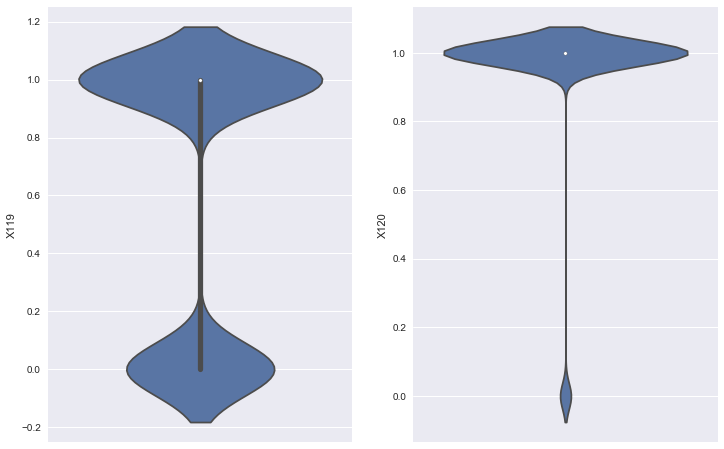

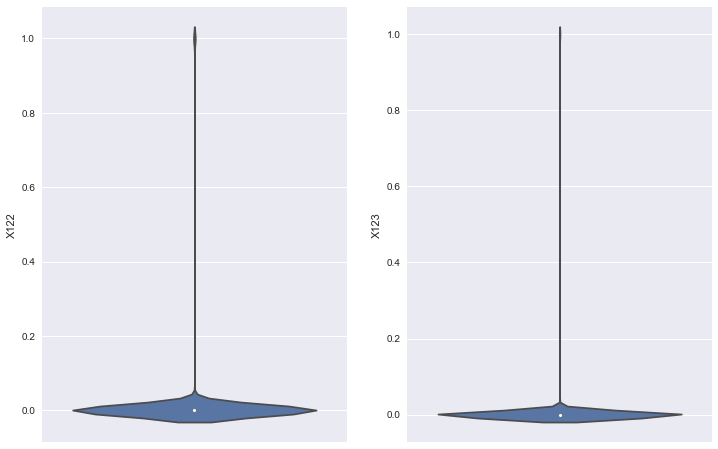

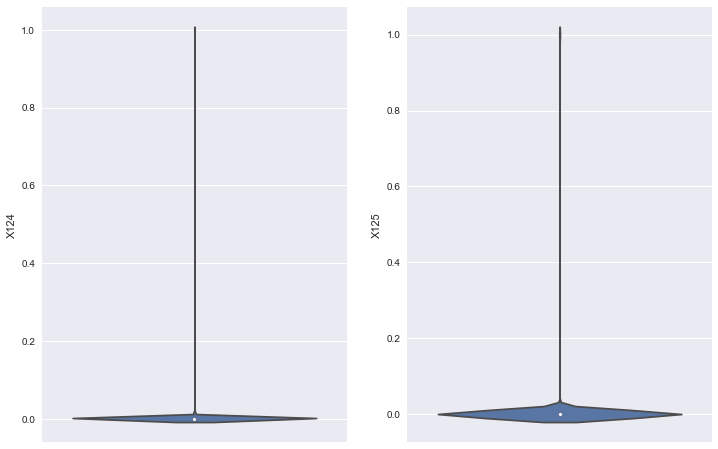

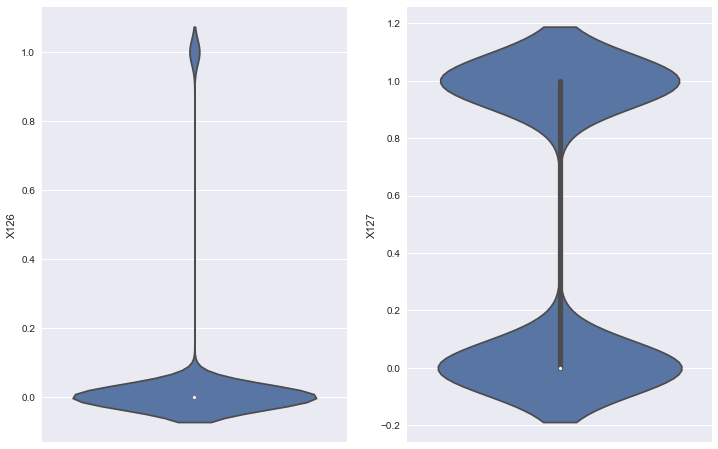

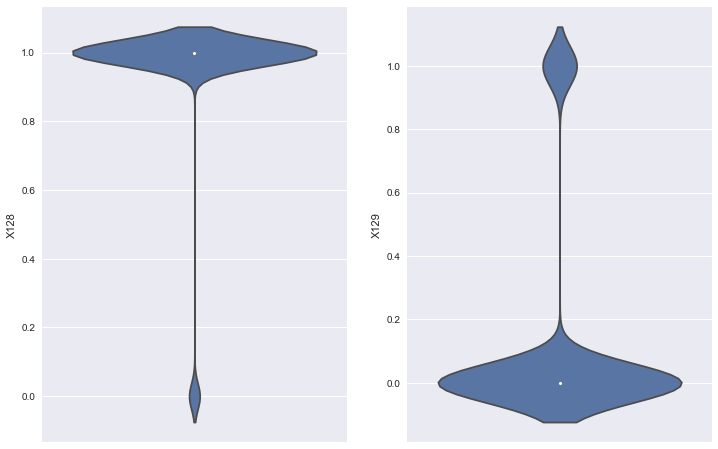

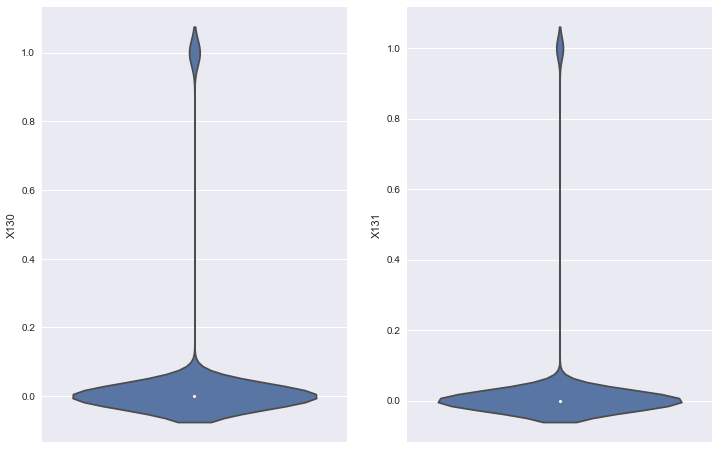

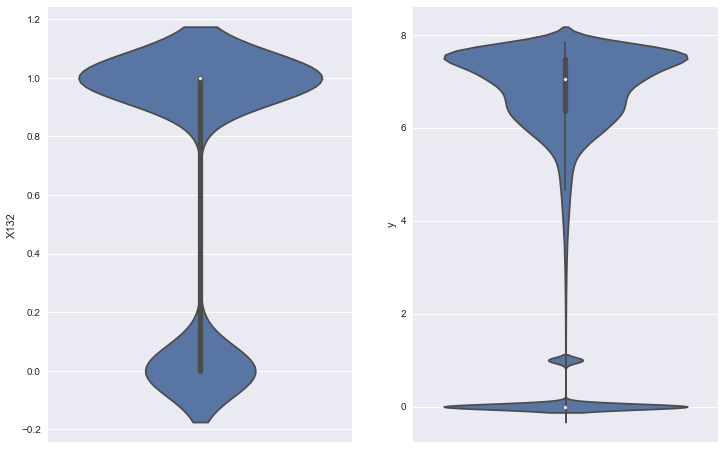

In [8]:
#log1p function applies log(1+x) to all elements of the column
dataset["y"] = numpy.log1p(dataset["y"])
#visualize the transformed column
sns.violinplot(data=dataset,y="y")  
plt.show()

#Plot shows that skew is corrected to a large extent

## Data Interaction
* Correlation

In [9]:
from scipy.stats import pearsonr
pearsonr(dataset['X8'], dataset['X11'])

(nan, 1.0)

In [10]:
# Correlation tells relation between two attributes.
# Correlation requires continous data. Hence, ignore categorical data

# Calculates pearson co-efficient for all combinations
data_corr = data.corr()

# Set the threshold to select only highly correlated attributes
threshold = 0.5

# List of pairs along with correlation above threshold
corr_list = []

#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: abs(x[0]), reverse=True)

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

# Strong correlation is observed between the following pairs
# This represents an opportunity to reduce the feature set through transformations such as PCA

X128 and X130 = -1.00
X126 and X134 = 0.75
X126 and X128 = -0.73
X126 and X130 = 0.73
X128 and X134 = -0.73
X130 and X134 = 0.73
X120 and X134 = -0.72
X132 and X133 = -0.56
X120 and X126 = -0.53
X120 and X128 = 0.51
X120 and X130 = -0.51


## Data Interaction
* Scatter plot

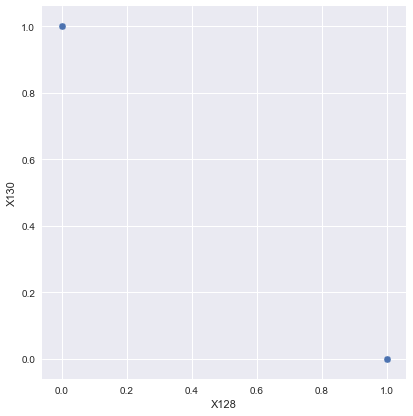

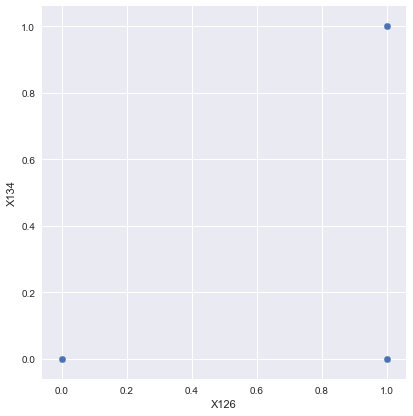

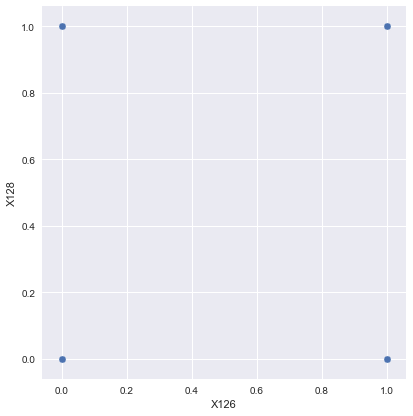

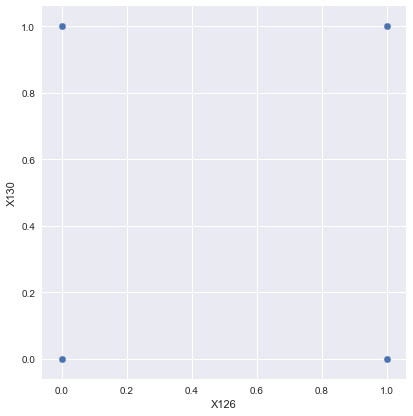

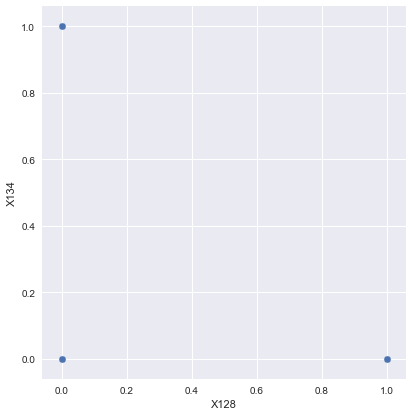

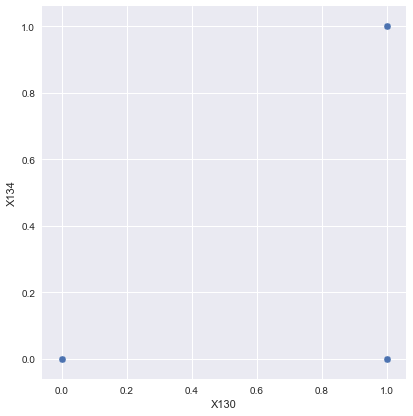

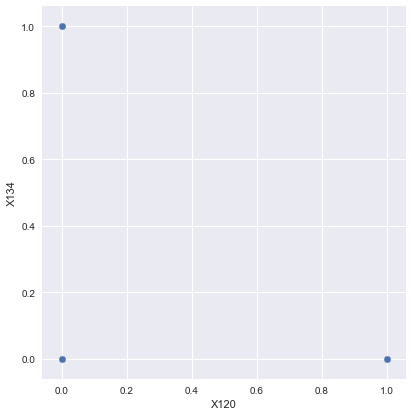

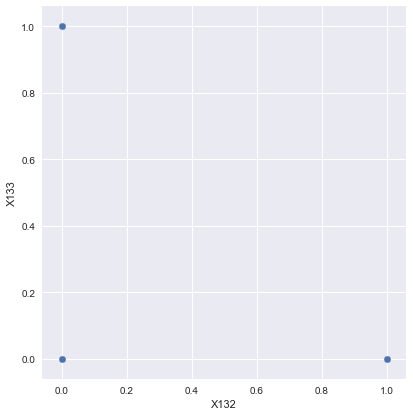

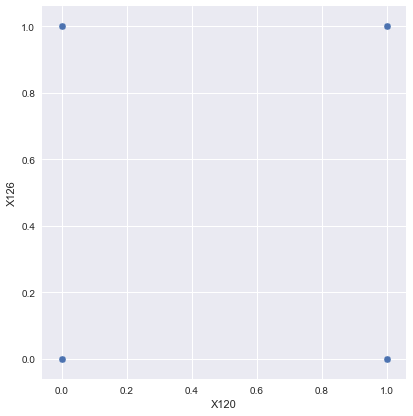

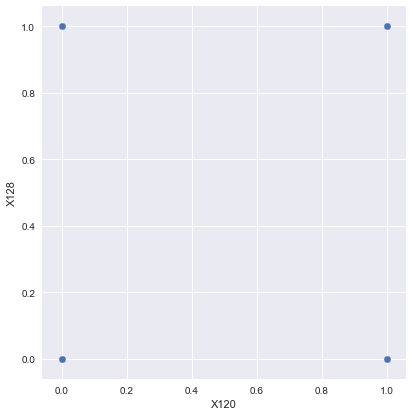

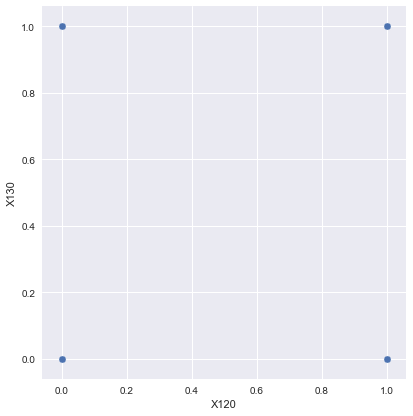

In [11]:
# Scatter plot of only the highly correlated pairs
for v,i,j in s_corr_list:
    sns.pairplot(dataset, size=6, x_vars=cols[i],y_vars=cols[j] )
    plt.show()



## Data Visualization
* Categorical attributes

In [76]:
# Count of each label in each category

#names of all the columns
cols = dataset.columns

#Plot count plot for all attributes in a 29x4 grid
n_cols = 4
n_rows = 29
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(12, 8))
    for j in range(n_cols):
        sns.countplot(x=cols[i*n_cols+j], data=dataset, ax=ax[j])

#cat1 to cat72 have only two labels A and B. In most of the cases, B has very few entries
#cat73 to cat 108 have more than two labels
#cat109 to cat116 have many labels

In [3]:
# Scatter plot of only the highly correlated pairs
for v,i,j in s_corr_list:
    sns.pairplot(dataset, size=6, x_vars=cols[i],y_vars=cols[j] )
    plt.show()

#cont11 and cont12 give an almost linear pattern...one must be removed
#cont1 and cont9 are highly correlated ...either of them could be safely removed 
#cont6 and cont10 show very good correlation too

NameError: name 's_corr_list' is not defined